In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_json('/Users/macbook/Documents/Work Work Work/VS Code Python/DA Project/Takeout/watch-history.json')
print(df.columns)

Index(['header', 'title', 'titleUrl', 'subtitles', 'time', 'products',
       'activityControls', 'description', 'details'],
      dtype='object')


In [2]:
#First thing first, get to know what is like your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34913 entries, 0 to 34912
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            34913 non-null  object
 1   title             34913 non-null  object
 2   titleUrl          34211 non-null  object
 3   subtitles         30587 non-null  object
 4   time              34913 non-null  object
 5   products          34913 non-null  object
 6   activityControls  34913 non-null  object
 7   description       2167 non-null   object
 8   details           2259 non-null   object
dtypes: object(9)
memory usage: 2.4+ MB


In [3]:
#Seeing as a dataframe and show a bit of a result
df.head()

,header,title,titleUrl,subtitles,time,products,activityControls,description,details
0,YouTube,Watched 𝗗𝗮𝘁𝗮 𝗔𝗻𝗮𝗹𝘆𝘁𝗶𝗰𝘀 PROJECT : Youtube Video...,https://www.youtube.com/watch?v=rsFTOAXMez0,"[{'name': 'Data Mentor', 'url': 'https://www.y...",2023-08-14T08:36:39.782Z,[YouTube],[YouTube watch history],NaN,NaN
1,YouTube,Watched Youtube API for Python: How to Create ...,https://www.youtube.com/watch?v=D56_Cx36oGY,"[{'name': 'Thu Vu data analytics', 'url': 'htt...",2023-08-14T08:34:39.985Z,[YouTube],[YouTube watch history],NaN,NaN
2,YouTube,Watched Preppin' Data 2023: Week 3 - Targets f...,https://www.youtube.com/watch?v=xhUpTPa59Is,"[{'name': 'Preppin' Data', 'url': 'https://www...",2023-08-14T06:58:46.670Z,[YouTube],[YouTube watch history],NaN,NaN
3,YouTube,Watched How to in Tableau Prep in 5 mins: Join...,https://www.youtube.com/watch?v=UblQU9zVgSk,"[{'name': 'The Information Lab', 'url': 'https...",2023-08-14T06:28:41.227Z,[YouTube],[YouTube watch history],NaN,NaN
4,YouTube,Watched lofi hip hop radio 📚 - beats to relax/...,https://www.youtube.com/watch?v=jfKfPfyJRdk,"[{'name': 'Lofi Girl', 'url': 'https://www.you...",2023-08-14T05:58:21.434Z,[YouTube],[YouTube watch history],NaN,NaN


In [4]:
#Drop all of the unnecessary column
df = df.drop(['header','description','details','products','activityControls'],axis=1)

In [5]:
#Apply pandas 'datetime' format for us to easily manipulate the date
df['time']=df['time'].apply(pd.to_datetime)

In [6]:
#Divide into year, month, day, hour, min, sec, etc.
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.strftime('%H:00')
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second
df['dayname'] = df['time'].dt.day_name()
df['weekend'] = df['time'].dt.day_name().isin(['Saturday','Sunday'])

In [7]:
#Drop every null value, to perform smoother analysis
df = df.dropna().reset_index(drop=True)

In [8]:
#Split 'Subtitles' into two, [0]: Youtube Channel Name, [1]:Youtube Link. But I only keep the Youtube channel name
#Clean the data
df.subtitles = df.subtitles.astype(str).str.split(",",regex=True, expand=True)[0]
df.subtitles.astype(str).str.removeprefix("[{'name': ")

0                  'Data Mentor'
1        'Thu Vu data analytics'
2                "Preppin' Data"
3          'The Information Lab'
4                    'Lofi Girl'
                  ...           
30582           'Fikri Abdillah'
30583             'agus susanto'
30584             'KBS WORLD TV'
30585         'JeremyZuckerVEVO'
30586             '1theK (원더케이)'
Name: subtitles, Length: 30587, dtype: object

In [9]:
#Cause this is series object, have to put "astype(str)" to change into string first and do the cleaning
df.subtitles = df.subtitles.astype(str).str.removeprefix("[{'name': ")
df.subtitles = df.subtitles.astype(str).str.removeprefix("'").str.removeprefix('"')
df.subtitles = df.subtitles.astype(str).str.removesuffix("'").str.removesuffix('"')
df.head()

,title,titleUrl,subtitles,time,year,month,day,hour,minute,second,dayname,weekend
0,Watched 𝗗𝗮𝘁𝗮 𝗔𝗻𝗮𝗹𝘆𝘁𝗶𝗰𝘀 PROJECT : Youtube Video...,https://www.youtube.com/watch?v=rsFTOAXMez0,Data Mentor,2023-08-14 08:36:39.782000+00:00,2023,8,14,08:00,36,39,Monday,False
1,Watched Youtube API for Python: How to Create ...,https://www.youtube.com/watch?v=D56_Cx36oGY,Thu Vu data analytics,2023-08-14 08:34:39.985000+00:00,2023,8,14,08:00,34,39,Monday,False
2,Watched Preppin' Data 2023: Week 3 - Targets f...,https://www.youtube.com/watch?v=xhUpTPa59Is,Preppin' Data,2023-08-14 06:58:46.670000+00:00,2023,8,14,06:00,58,46,Monday,False
3,Watched How to in Tableau Prep in 5 mins: Join...,https://www.youtube.com/watch?v=UblQU9zVgSk,The Information Lab,2023-08-14 06:28:41.227000+00:00,2023,8,14,06:00,28,41,Monday,False
4,Watched lofi hip hop radio 📚 - beats to relax/...,https://www.youtube.com/watch?v=jfKfPfyJRdk,Lofi Girl,2023-08-14 05:58:21.434000+00:00,2023,8,14,05:00,58,21,Monday,False


In [10]:
#Removing 'Watched' text in every titles
df['title']=df['title'].str.replace('Watched','',regex=True)
df.head()

,title,titleUrl,subtitles,time,year,month,day,hour,minute,second,dayname,weekend
0,𝗗𝗮𝘁𝗮 𝗔𝗻𝗮𝗹𝘆𝘁𝗶𝗰𝘀 PROJECT : Youtube Video Data A...,https://www.youtube.com/watch?v=rsFTOAXMez0,Data Mentor,2023-08-14 08:36:39.782000+00:00,2023,8,14,08:00,36,39,Monday,False
1,Youtube API for Python: How to Create a Uniqu...,https://www.youtube.com/watch?v=D56_Cx36oGY,Thu Vu data analytics,2023-08-14 08:34:39.985000+00:00,2023,8,14,08:00,34,39,Monday,False
2,Preppin' Data 2023: Week 3 - Targets for DSB,https://www.youtube.com/watch?v=xhUpTPa59Is,Preppin' Data,2023-08-14 06:58:46.670000+00:00,2023,8,14,06:00,58,46,Monday,False
3,How to in Tableau Prep in 5 mins: Join Clauses,https://www.youtube.com/watch?v=UblQU9zVgSk,The Information Lab,2023-08-14 06:28:41.227000+00:00,2023,8,14,06:00,28,41,Monday,False
4,lofi hip hop radio 📚 - beats to relax/study to,https://www.youtube.com/watch?v=jfKfPfyJRdk,Lofi Girl,2023-08-14 05:58:21.434000+00:00,2023,8,14,05:00,58,21,Monday,False


In [11]:
#Modified Column name
df = df.rename(columns={'title':'Video Title','titleUrl':'Video URL','subtitles':'Youtube Channel'})

In [12]:
#Recent 3 youtube video that I watched
Recent_3 = df['Video Title'][0:3]
Recent_3

0     𝗗𝗮𝘁𝗮 𝗔𝗻𝗮𝗹𝘆𝘁𝗶𝗰𝘀 PROJECT : Youtube Video Data A...
1     Youtube API for Python: How to Create a Uniqu...
2         Preppin' Data 2023: Week 3 - Targets for DSB
Name: Video Title, dtype: object

/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


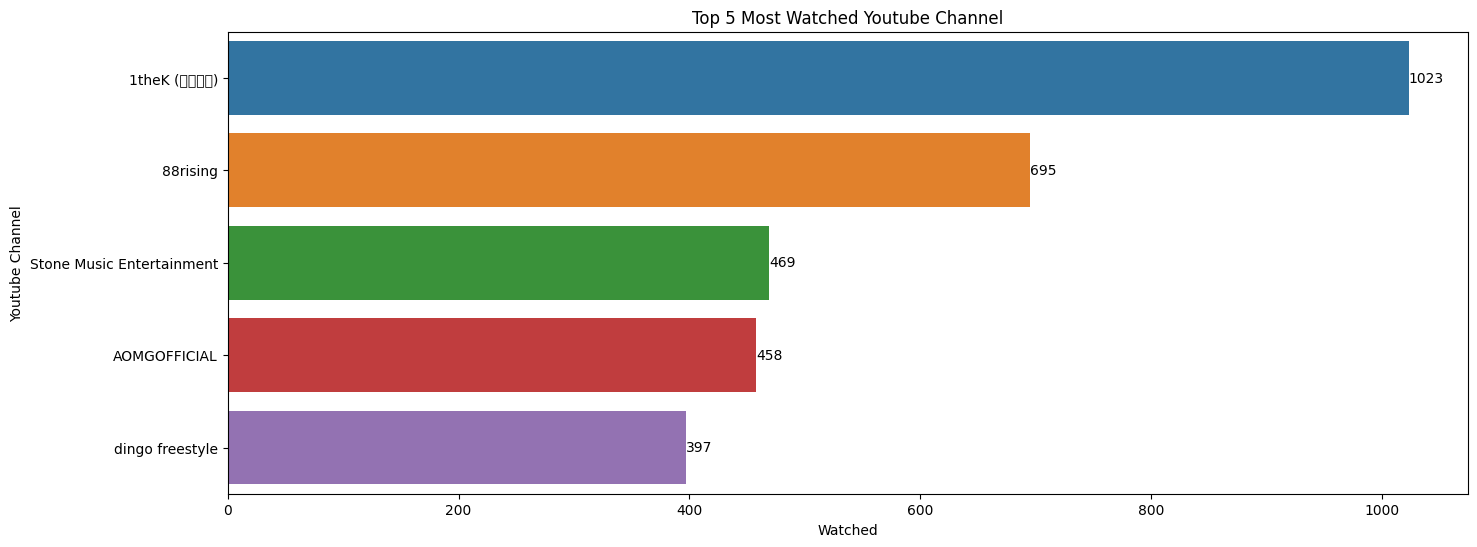

In [13]:
#Show top 5 youtube channel that I watched 
channel = df['Youtube Channel'].groupby(df['Youtube Channel']).count()
channel = channel.sort_values(ascending=False).head(5)

plt.figure(figsize=(16,6))
ax = sns.barplot(x=channel,y=channel.index)
ax.set(ylabel='Youtube Channel',xlabel='Watched',title='Top 5 Most Watched Youtube Channel') #How to show label and title
ax.bar_label(ax.containers[0]) #How to show value in plot
plt.show()

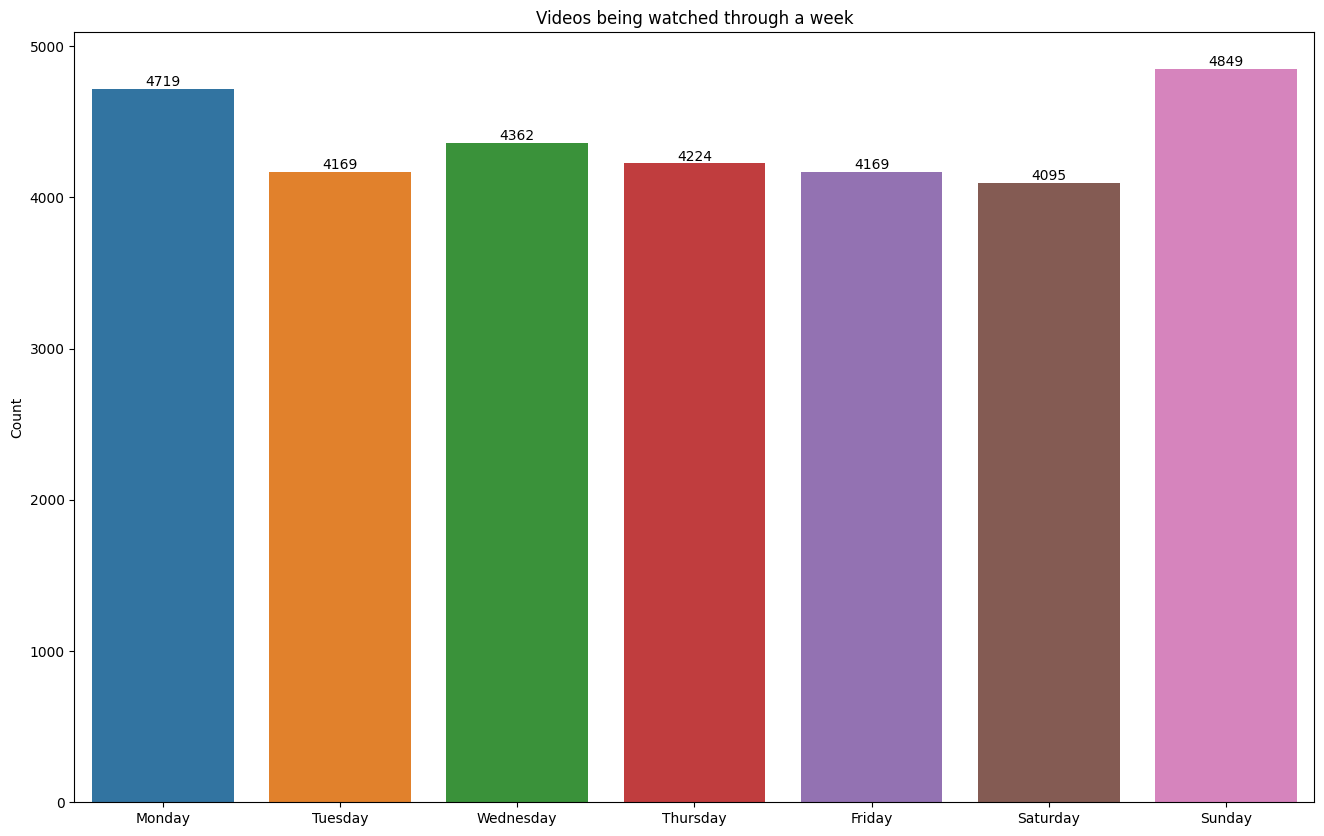

In [14]:
#Assign barplot on Videos being watched in a week for a certain time
watch = pd.Categorical(df['dayname'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
watch = df['dayname'].groupby(watch).count()


plt.figure(figsize=(16,10))
ax = sns.barplot(y=watch,x=watch.index)
ax.set(ylabel='Count',title='Videos being watched through a week') 
ax.bar_label(ax.containers[0])
plt.show()

In [15]:
#How to make a wordcloud from the the youtube video title that I watched
text = ' '.join(df['Video Title'].tolist())
wordcloud = WordCloud(background_color='white', max_font_size=100).generate(text)

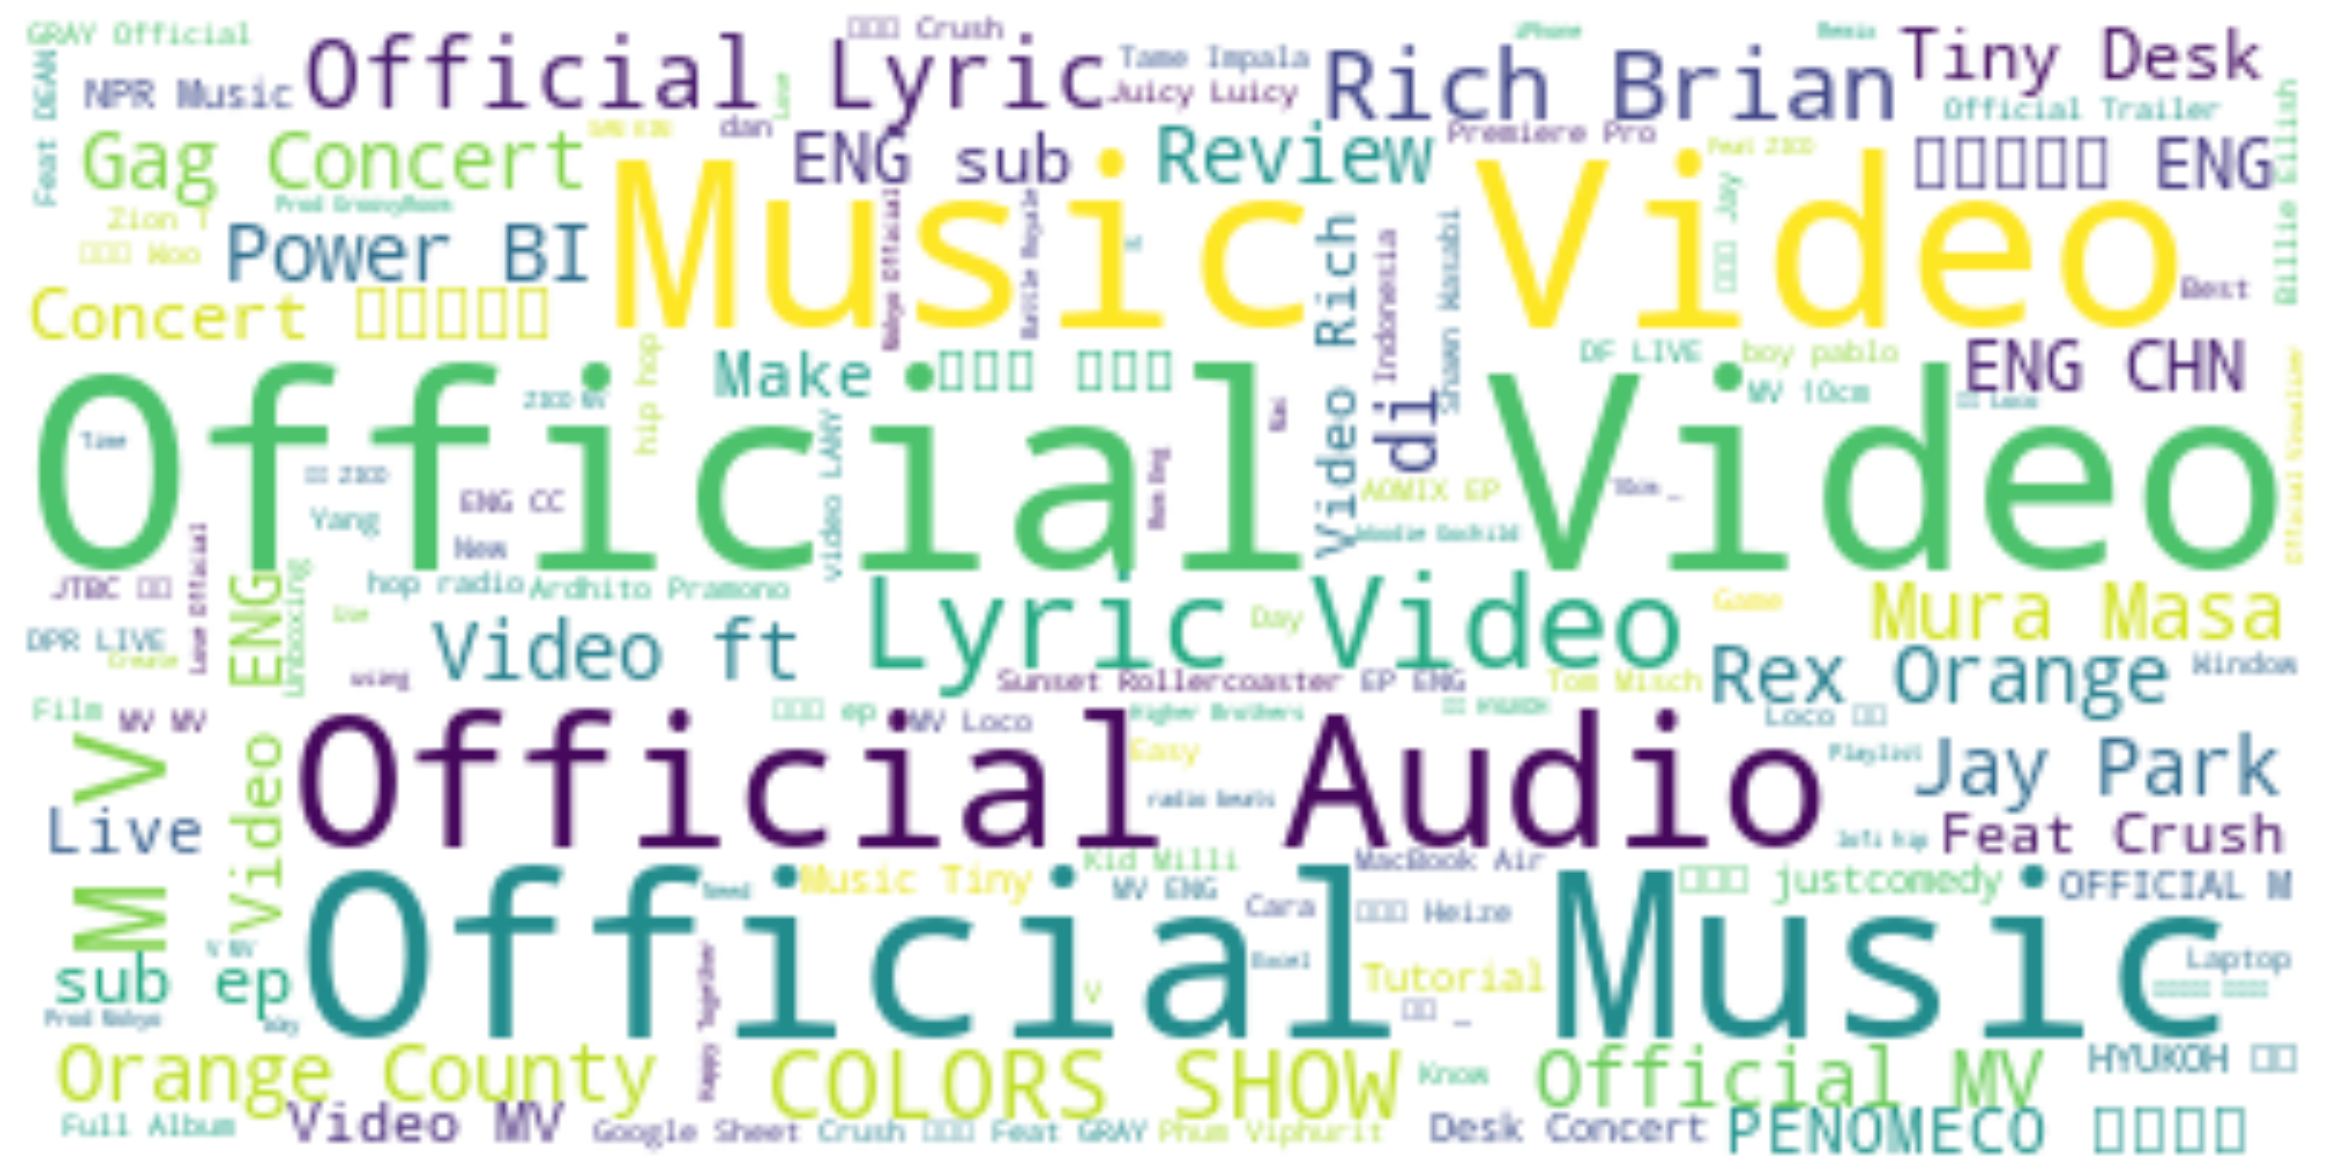

In [16]:
plt.figure(figsize=(30,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

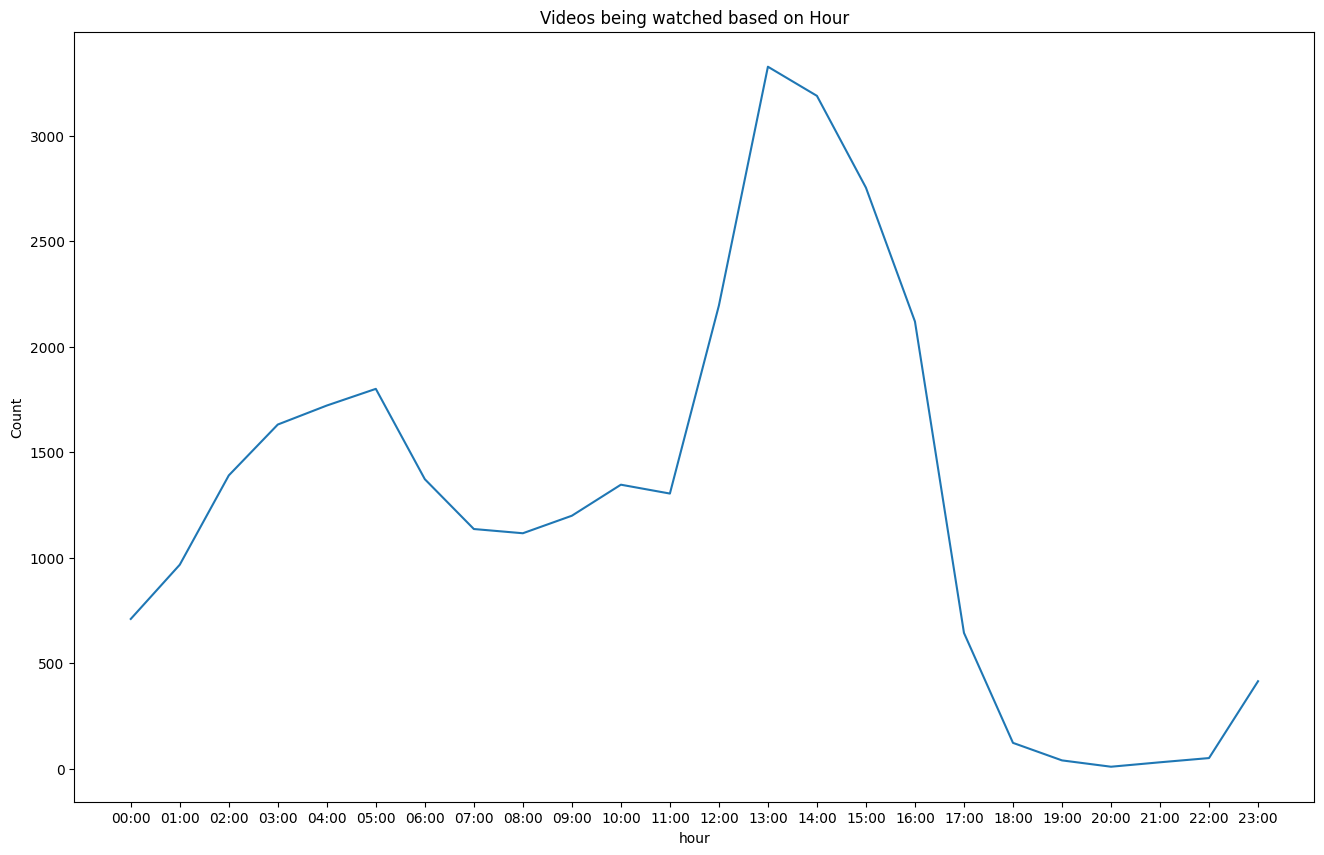

In [17]:
#Time distribution on how I watch my youtube videos
watch_hour = df['hour'].groupby(df['hour']).count()

plt.figure(figsize=(16,10))
ax = sns.lineplot(watch_hour)
ax.set(ylabel='Count',title='Videos being watched based on Hour') #How to show label and title
plt.show()


/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54168 (\N{HANGUL SYLLABLE PE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from curre

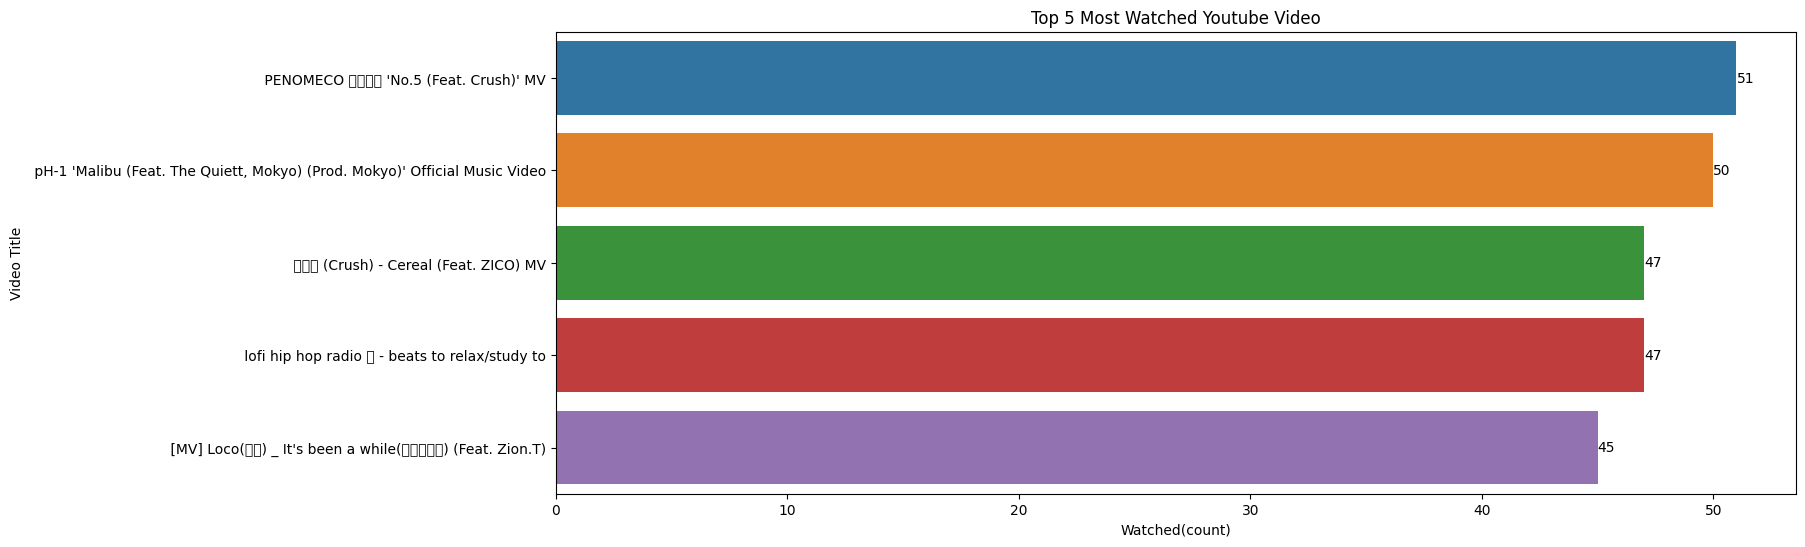

In [18]:
#Top 5 most watched youtube videos
most_watch = df['Video Title'].groupby(df['Video Title']).count()
most_watch = most_watch.sort_values(ascending=False).head(5)

plt.figure(figsize=(16,6))
ax = sns.barplot(x=most_watch,y=most_watch.index)
ax.set(ylabel='Video Title',xlabel='Watched(count)',title='Top 5 Most Watched Youtube Video') #How to show label and title
ax.bar_label(ax.containers[0]) #How to show value in plot
plt.show()


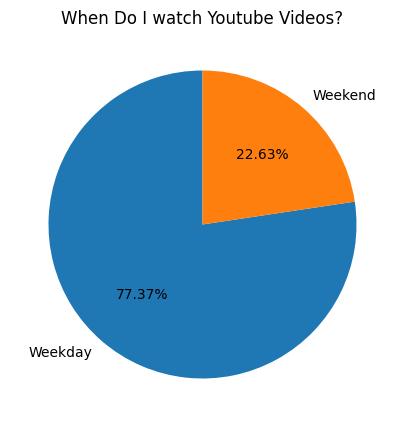

In [19]:
#Try to know my distribution on how I watch my youtube videos: Weekday VS Weekend
sum_weekend = df['weekend'].groupby(df['weekend']).count()[1].astype(float)

pie_values = [df.shape[0],sum_weekend]

pie_vars = ['Weekday','Weekend']

plt.figure(figsize=(5,5))
plt.title('When Do I watch Youtube Videos?')
plt.pie(pie_values,labels=pie_vars,autopct='%1.2f%%',startangle=90)
plt.show()



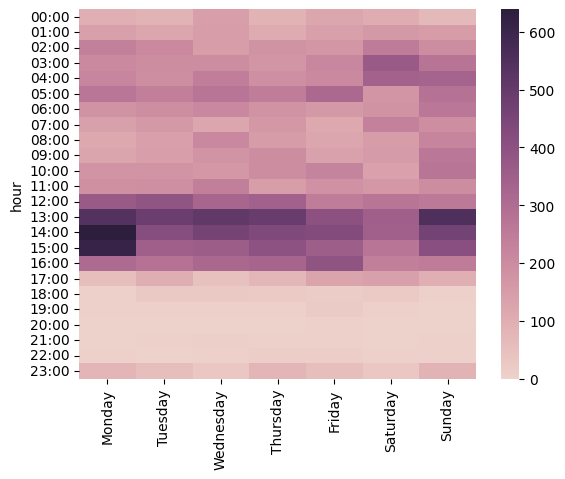

In [20]:
#Create Heat Map to clearly show whats my Youtube watching pattern based on time and day of the week?
daynames = pd.Categorical(df['dayname'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)

hour_dayname = df.groupby(['hour',daynames]).count()['Video Title'].unstack();

sns.heatmap(hour_dayname,cmap=sns.cubehelix_palette(as_cmap=True));